In [4]:
import os
import sys

# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import preprocessor as pp
from Translator import Translator
import peakdetect

def test_mage(data, day):
    
    # Calculate vector of glucose values
    values = data[data["Day_Block"] == day.date()][["Datetime", "Glucose_Auto"]].reset_index(drop=True)
    vector = values["Glucose_Auto"]

    # Calculate standard deviation of the values
    std = np.std(vector)

    # Calculate peaks of the values (Starting points of excursions) - Indexes and values
    peaks = peakdetect.peakdetect(np.array(vector), lookahead=2, delta=std)
    indexes = []
    peak_values = []
    for posOrNegPeaks in peaks:
        for peak in posOrNegPeaks:
            indexes.append(peak[0])
            peak_values.append((peak[1]))
    
    print('Standard deviation is {:f}'.format(std))
    print('Peaks indexes are: %s' % indexes)
    print('Peaks values are: %s' % peak_values)

    # Calculate differences between consecutive peaks
    differences = []
    for first, second in zip(peak_values, peak_values[1:]):
        differences.append(np.abs(first - second))

    # Filter differences greater than standard deviation
    valid_differences = [elem for elem in differences if elem > std]

    # Return MAGE
    if len(valid_differences) == 0:
        MAGE = np.nan
    else:
        MAGE = sum(valid_differences) / len(valid_differences)
        
    print('MAGE is :{:f}'.format(MAGE))

    _, ax = plt.subplots()
    values.plot(ax=ax, kind='line', x="Datetime", y="Glucose_Auto")
    ax.plot(values.ix[indexes]["Datetime"], values.ix[indexes]["Glucose_Auto"], '+', mfc=None, mec='b', mew=2, ms=8)
    ax.plot(values.ix[sorted(indexes)]["Datetime"], values.ix[sorted(indexes)]["Glucose_Auto"], mfc=None, mec='g', mew=2, ms=8)

    plt.show()
    
# Define language and translator functions
language = "es"
translator = Translator(language)
to_lang = translator.translate_to_language
to_col = translator.translate_to_column

# Load data
raw_data = pd.read_csv("data/ACN_20160331_20160414_FREE_STYLE.txt", header=0, skiprows=1, delimiter="\t", index_col=0, usecols=list(range(0, 9)),
                       parse_dates=to_lang(["Datetime"]), decimal=",",
                       date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M"))
# Translate column names
raw_data.columns = (to_col(raw_data.columns))

# Divide in blocks, extend dataset and clean data

block_data = pp.define_blocks(raw_data)

#ACN - 31/03/2016 - 14/04/2016 - FREE STYLE - MAGE ANALYSIS

Standard deviation is 19.266328
Peaks indexes are: [5, 33, 9]
Peaks values are: [83.0, 123.0, 55.0]
MAGE is :54.000000


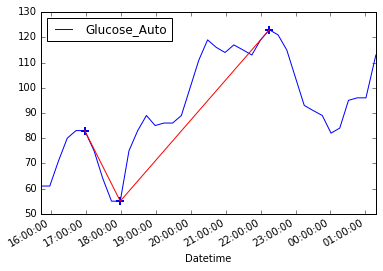

In [5]:
test_mage(block_data, datetime(2016, 3, 31))

Standard deviation is 44.572693
Peaks indexes are: [9, 38, 102, 152, 31, 49, 144]
Peaks values are: [224.0, 139.0, 169.0, 161.0, 93.0, 47.0, 52.0]
MAGE is :66.333333


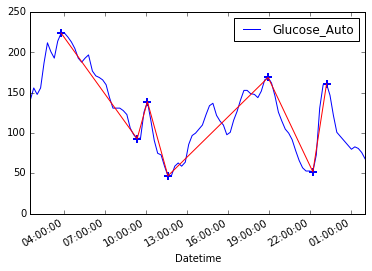

In [6]:
test_mage(block_data, datetime(2016, 4, 1))

Standard deviation is 54.894712
Peaks indexes are: [19, 34, 120, 30, 52]
Peaks values are: [166.0, 169.0, 252.0, 112.0, 56.0]
MAGE is :93.000000


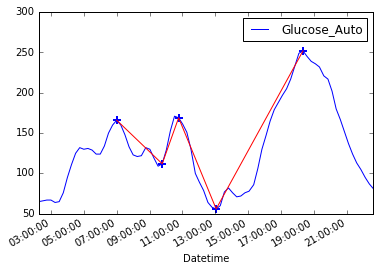

In [7]:
test_mage(block_data, datetime(2016, 4, 2))

Standard deviation is 38.681834
Peaks indexes are: [11, 51, 76, 44, 62, 85]
Peaks values are: [234.0, 158.0, 140.0, 93.0, 100.0, 62.0]
MAGE is :61.500000


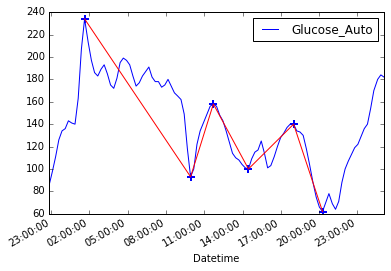

In [12]:
test_mage(block_data, datetime(2016, 4, 3))

Standard deviation is 36.979659
Peaks indexes are: [29, 71, 92, 24, 61, 76]
Peaks values are: [186.0, 105.0, 148.0, 79.0, 60.0, 61.0]
MAGE is :64.333333


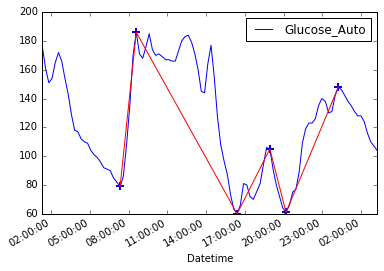

In [17]:
test_mage(block_data, datetime(2016, 4, 4))

Standard deviation is 26.507337
Peaks indexes are: [6, 50, 72, 36, 65, 92]
Peaks values are: [131.0, 150.0, 137.0, 51.0, 94.0, 46.0]
MAGE is :59.000000


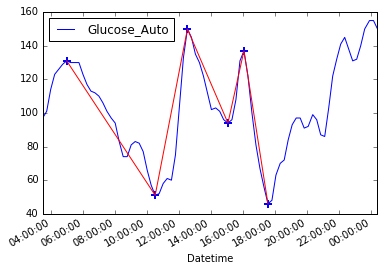

In [23]:
test_mage(block_data, datetime(2016, 4, 5))

Standard deviation is 33.457436
Peaks indexes are: [48, 104, 34, 60, 128]
Peaks values are: [180.0, 133.0, 56.0, 92.0, 61.0]
MAGE is :53.333333


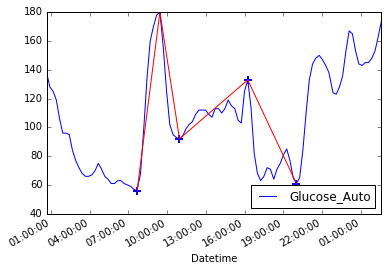

In [32]:
test_mage(block_data, datetime(2016, 4, 6))

Standard deviation is 43.532073
Peaks indexes are: [22, 57, 99, 18, 29, 85]
Peaks values are: [170.0, 171.0, 109.0, 131.0, 101.0, 63.0]
MAGE is :62.000000


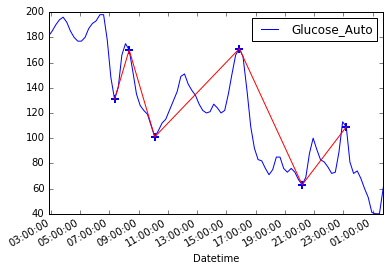

In [41]:
test_mage(block_data, datetime(2016, 4, 7))

Standard deviation is 69.673381
Peaks indexes are: [12, 73, 54, 81]
Peaks values are: [309.0, 248.0, 70.0, 60.0]
MAGE is :178.000000


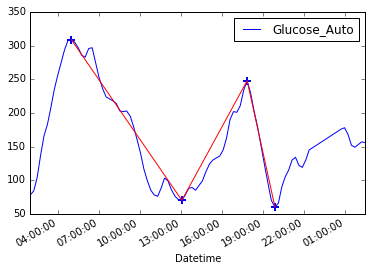

In [70]:
test_mage(block_data, datetime(2016, 4, 8))

Standard deviation is 42.927743
Peaks indexes are: [32, 173, 24, 98, 183]
Peaks values are: [208.0, 114.0, 64.0, 49.0, 73.0]
MAGE is :72.000000


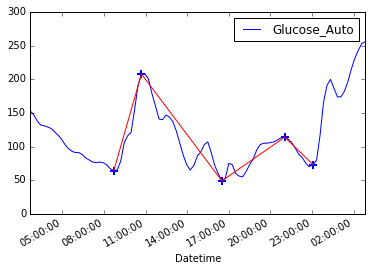

In [71]:
test_mage(block_data, datetime(2016, 4, 9))

Standard deviation is 34.842298
Peaks indexes are: [30, 48, 80, 109, 19, 41, 74, 86, 119]
Peaks values are: [175.0, 209.0, 161.0, 180.0, 100.0, 139.0, 100.0, 74.0, 87.0]
MAGE is :51.500000


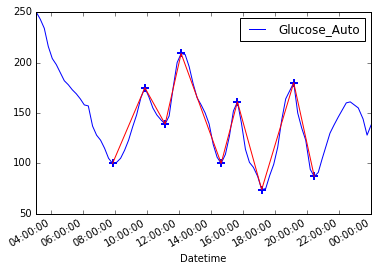

In [72]:
test_mage(block_data, datetime(2016, 4, 10))

Standard deviation is 60.846617
Peaks indexes are: [18, 65, 45, 74]
Peaks values are: [273.0, 169.0, 62.0, 45.0]
MAGE is :105.500000


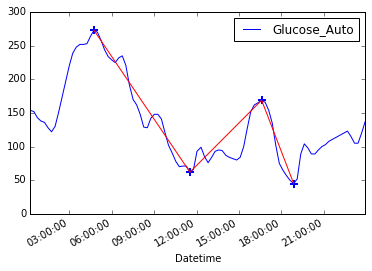

In [73]:
test_mage(block_data, datetime(2016, 4, 11))

Standard deviation is 37.656076
Peaks indexes are: [26, 137, 237, 347, 97, 217, 315]
Peaks values are: [213.0, 116.0, 154.0, 196.0, 61.0, 56.0, 48.0]
MAGE is :78.000000


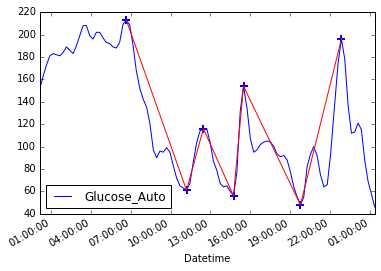

In [74]:
test_mage(block_data, datetime(2016, 4, 12))

Standard deviation is 46.816892
Peaks indexes are: [9, 29, 69, 176, 23, 41, 143, 189]
Peaks values are: [121.0, 160.0, 199.0, 106.0, 69.0, 58.0, 51.0, 51.0]
MAGE is :93.000000


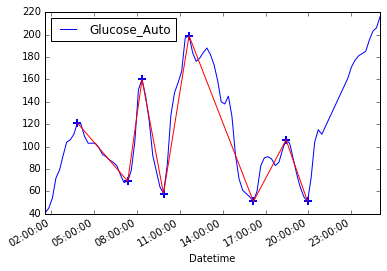

In [75]:
test_mage(block_data, datetime(2016, 4, 13))